In [5]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
#Loading and preparing the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
#to see length of training dataset
len(x_train)

60000

In [7]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [8]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

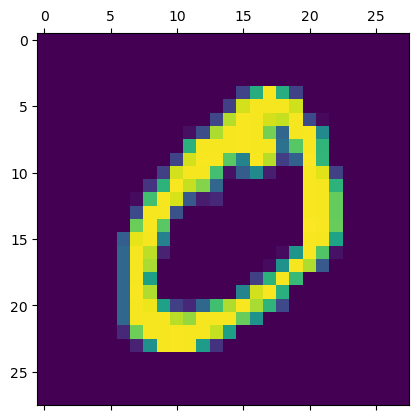

In [10]:
#to see how first image look
plt.matshow(x_train[1])

In [11]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
#Define the network architecture using Keras
#Creating the model
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
#Train the model
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8274 - loss: 0.6759 - val_accuracy: 0.8985 - val_loss: 0.3707
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9038 - loss: 0.3493 - val_accuracy: 0.9145 - val_loss: 0.3071
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9154 - loss: 0.3027 - val_accuracy: 0.9214 - val_loss: 0.2778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9239 - loss: 0.2745 - val_accuracy: 0.9291 - val_loss: 0.2562
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9293 - loss: 0.2539 - val_accuracy: 0.9323 - val_loss: 0.2407
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9346 - loss: 0.2363 - val_accuracy: 0.9369 - val_loss: 0.2254
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9390 - loss: 0.2210 - val_accuracy: 0.9398 - val_loss: 0.2119
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9422 - loss: 0.2076 -

In [18]:
#Evaluate the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9486 - loss: 0.1818
Loss=0.182
Accuracy=0.949


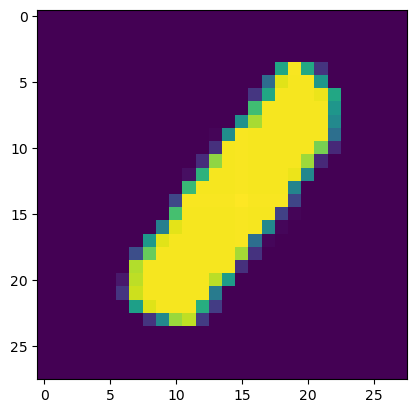

In [19]:
#Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [20]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Handwritten number in the image is= 8


In [25]:
#Plot graph for Accuracy and Loss
history.history

{'accuracy': [0.8274333477020264,
  0.9037666916847229,
  0.9154333472251892,
  0.9239166378974915,
  0.9292500019073486,
  0.9345999956130981,
  0.9390166401863098,
  0.942216694355011,
  0.9461666941642761,
  0.9488833546638489],
 'loss': [0.6758609414100647,
  0.3493492305278778,
  0.3027298152446747,
  0.2745019495487213,
  0.2538577914237976,
  0.23627427220344543,
  0.22101424634456635,
  0.20759308338165283,
  0.19566795229911804,
  0.1848042905330658],
 'val_accuracy': [0.8985000252723694,
  0.9144999980926514,
  0.9214000105857849,
  0.929099977016449,
  0.9322999715805054,
  0.9369000196456909,
  0.9398000240325928,
  0.9442999958992004,
  0.9462000131607056,
  0.9485999941825867],
 'val_loss': [0.37069782614707947,
  0.3071315586566925,
  0.2778274118900299,
  0.2561625838279724,
  0.2406967282295227,
  0.22536799311637878,
  0.21192187070846558,
  0.19933949410915375,
  0.18943433463573456,
  0.1818152517080307]}

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

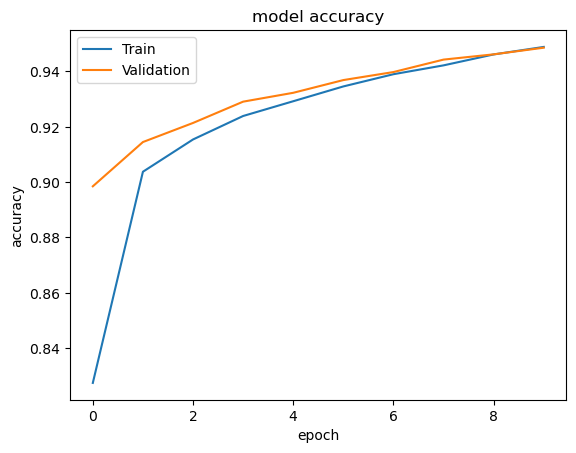

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

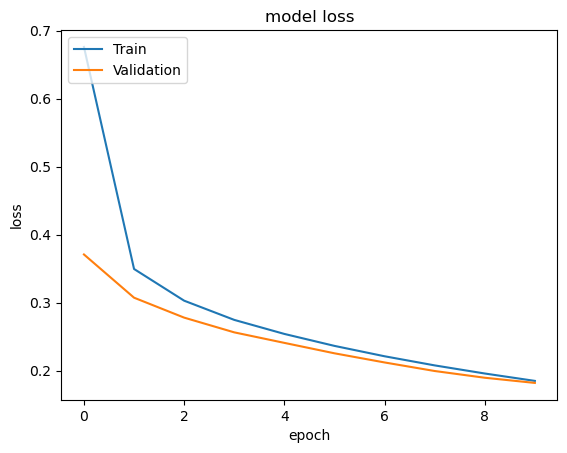

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

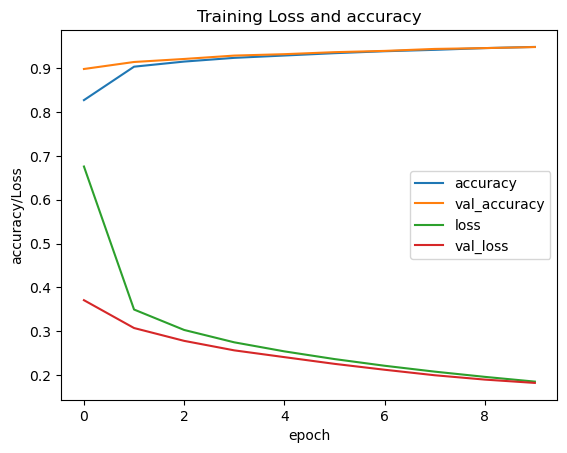

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [29]:
pwd

'C:\\Users\\Pushpak Warke'

In [31]:
#Save the model
keras_model_path = 'C:\\Users\\Pushpak Warke\\my_model.keras'
model.save(keras_model_path)


In [34]:
restored_keras_model = tf.keras.models.load_model('C:\\Users\\Pushpak Warke\\my_model.keras')
